AQUÍ COMENÇA EL CODI PER GENERAR UNA CALCULADORA QUE M'AJUDARÀ A TENIR UNA MILLOR ESTABILITAT FINANCERA

In [12]:
import matplotlib.pyplot as plt


Tipus desconegut de despesa. S'està registrant com a 'altres'.
Has gastat: 300.00€ en ETF.
El saldo actual és de: -300.00€
Has ingressat: 400.00€ en dividends.
El saldo actual és de: 100.00€
Has gastat: 300.00€ en viatges.
El saldo actual és de: -200.00€
Has ingressat: 150.00€ en regal.
El saldo actual és de: -50.00€
El saldo final és de: -50.00€
---Ingressos per tipus---
Treball: 0.00€
Dividends: 400.00€
Interessos: 0.00€
Regal: 150.00€
Altres: 0.00€

Ingressos totals: 550.00€

Rendiments de capital (Dividends + Interessos): 400.00€
---Despeses per tipus---
Lloguer: 0.00€
Alimentació: 0.00€
Subministraments: 0.00€
Transport: 0.00€
Despeses llar: 0.00€
Etf: 0.00€
Accions: 0.00€
Viatges: 300.00€
Oci: 0.00€
Restaurant: 0.00€
Altres: 300.00€

Despeses totals: 600.00€

Despesa en inversió (ETF + Accions): 0.00€
Despesa essencials (Lloguer + Alimentació): 0.00€
Despesa en oci (Viatges + Oci): 300.00€

Saldo final: -50.00€


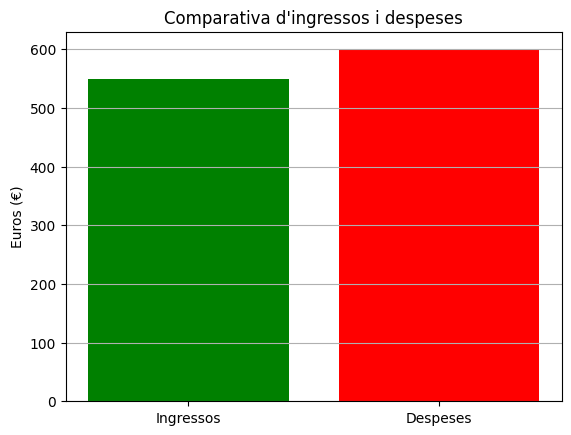

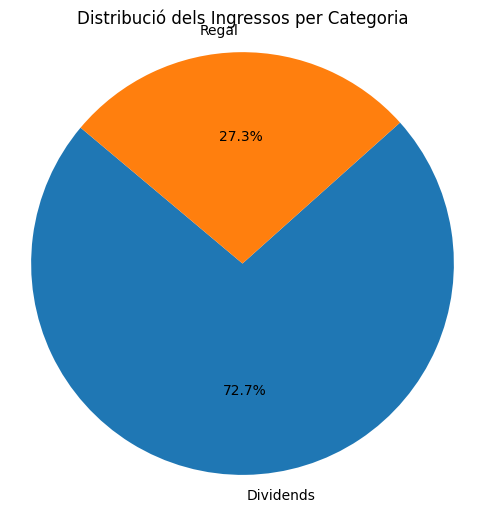

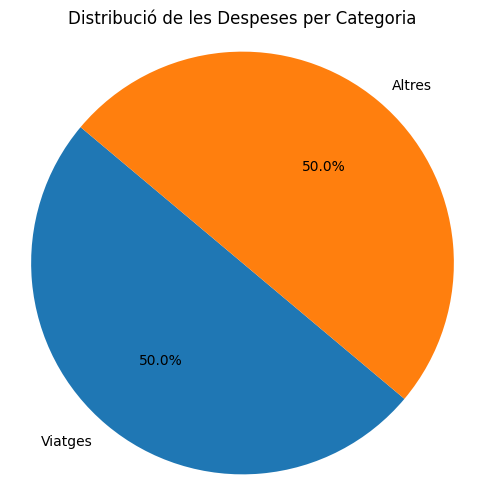

In [14]:
saldo = 0.0 #Saldo inicial

ingressos = {
    "treball": 0.0,
    "dividends": 0.0,
    "interessos": 0.0,
    "regal": 0.0,
    "altres": 0.0
}

despeses = {
    "lloguer": 0.0,
    "alimentació": 0.0,
    "subministraments": 0.0,
    "transport": 0.0,
    "despeses llar": 0.0,
    "ETF": 0.0,
    "accions": 0.0,
    "viatges": 0.0,
    "oci": 0.0,
    "restaurant": 0.0,
    "altres": 0.0

}

#Funció per demanar una quantitat numèrica i no peti si l'usuari introdueix un valor no numèric

def demanar_quantitat(missatge):
    while True:
        entrada = input(missatge)
        try:
            return float(entrada)
        except ValueError:
            print("⚠️  Si us plau, introdueix un número vàlid.")

while True:
    moviment=input("Has fet una despesa o has tingut un ingrés?")

    if moviment.lower() == "ingrés":

        quantitat = demanar_quantitat("Quina quantitat has ingressat? ")
        tipus=input("Quin tipus d'ingrés és?")

        saldo+=quantitat

        if tipus.lower() in ingressos:
            ingressos[tipus.lower()] += quantitat
        else:
            print("Tipus desconegut d'ingrés. S'està registrant com a 'altres'.")
            ingressos["altres"] += quantitat
        
        print(f"Has ingressat: {quantitat:.2f}€ en {tipus}.") 
        print(f"El saldo actual és de: {saldo:.2f}€")

    elif moviment == "despesa":

        quantitat = demanar_quantitat("Quina quantitat has gastat? ")
        tipus=input("Quin tipus de despesa és?")

        saldo-=quantitat

        if tipus.lower() in despeses:
            despeses[tipus.lower()] += quantitat
        else:
            print("Tipus desconegut de despesa. S'està registrant com a 'altres'.")
            despeses["altres"] += quantitat
        print(f"Has gastat: {quantitat:.2f}€ en {tipus}.")
        print(f"El saldo actual és de: {saldo:.2f}€")
        
    elif moviment =="sortir":
        print(f"El saldo final és de: {saldo:.2f}€")

        print("---Ingressos per tipus---")
        for tipus, quantitat in ingressos.items():
            print(f"{tipus.capitalize()}: {quantitat:.2f}€")

        #Calcular ingressos totals
        ingressos_totals = sum(ingressos.values())
        print(f"\nIngressos totals: {ingressos_totals:.2f}€")

        #Calcular rendiments de capital
        capital = ingressos.get("dividends", 0.0) + ingressos.get("interessos", 0.0)
        print(f"\nRendiments de capital (Dividends + Interessos): {capital:.2f}€")

        print("---Despeses per tipus---")
        for tipus, quantitat in despeses.items():
            print(f"{tipus.capitalize()}: {quantitat:.2f}€")

        #Calcular despeses totals
        despeses_totals = sum(despeses.values())
        print(f"\nDespeses totals: {despeses_totals:.2f}€")

        #Calcular despesa en inversió
        inversio = despeses.get("ETF", 0.0) + despeses.get("accions", 0.0)
        print(f"\nDespesa en inversió (ETF + Accions): {inversio:.2f}€")

        #Calcular despesa essencials
        essencials = despeses.get("lloguer", 0.0) + despeses.get("alimentació", 0.0) + despeses.get("subministraments", 0.0) + despeses.get("transport", 0.0) + despeses.get("despeses llar", 0.0)
        print(f"Despesa essencials (Lloguer + Alimentació): {essencials:.2f}€")

        #Calcular despesa en oci
        oci = despeses.get("viatges", 0.0) + despeses.get("oci", 0.0) + despeses.get("restaurant", 0.0)
        print(f"Despesa en oci (Viatges + Oci): {oci:.2f}€")

        #Calcular saldo final
        saldo_final = saldo
        print(f"\nSaldo final: {saldo_final:.2f}€")

        # Calcular totals
        total_ingressos = sum(ingressos.values())
        total_despeses = sum(despeses.values())

        # Crear gràfic de barres
        categories = ['Ingressos', 'Despeses']
        valors = [total_ingressos, total_despeses]

        plt.bar(categories, valors, color=['green', 'red'])
        plt.title('Comparativa d\'ingressos i despeses')
        plt.ylabel('Euros (€)')
        plt.grid(axis='y')

        # Mostrar el gràfic
        plt.show()

        # -------- GRÀFIC DE FORMATGE: Ingressos per categoria --------
        labels_ingressos = []
        valors_ingressos = []

        for categoria, quantitat in ingressos.items():
            if quantitat > 0:
                labels_ingressos.append(categoria.capitalize())
                valors_ingressos.append(quantitat)

        if valors_ingressos:
            plt.figure(figsize=(6, 6))
            plt.pie(valors_ingressos, labels=labels_ingressos, autopct='%1.1f%%', startangle=140)
            plt.title("Distribució dels Ingressos per Categoria")
            plt.axis('equal')  # Assegura que el gràfic sigui rodó
            plt.show()
        else:
            print("No hi ha ingressos per mostrar en el gràfic de formatge.")

        # -------- GRÀFIC DE FORMATGE: Despeses per categoria --------
        labels_despeses = []
        valors_despeses = []

        for categoria, quantitat in despeses.items():
            if quantitat > 0:
                labels_despeses.append(categoria.capitalize())
                valors_despeses.append(quantitat)

        if valors_despeses:
            plt.figure(figsize=(6, 6))
            plt.pie(valors_despeses, labels=labels_despeses, autopct='%1.1f%%', startangle=140)
            plt.title("Distribució de les Despeses per Categoria")
            plt.axis('equal')
            plt.show()
        else:
            print("No hi ha despeses per mostrar en el gràfic de formatge.")



        break
    else:
        print("Moviment no vàlid. Si us plau, introdueix 'ingrés', 'despesa' o 'Sortir'.")
    
    

